<a href="https://colab.research.google.com/github/nigowda/DAV3-Fundamentals-Pulkith/blob/main/08.Lecture%20%7C%20Advanced%20Hypothesis%20Testing/anova_continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv

--2024-07-05 15:56:07--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.138, 74.125.20.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-07-05 15:56:07--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.004s  

2024-07-05 15:56:08 (100 MB/s) 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_hw = pd.read_csv("weight-height.csv")
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [ ]:
print("Mean of men height:",height_men.mean() , "Mean of women height:",height_women.mean())

Mean of men height: 69.02634590621741 Mean of women height: 63.70877360342507


In [ ]:
print("Variance of men height:",height_men.var() , "Variance of women height:",height_women.var())

Variance of men height: 8.198843252520467 Variance of women height: 7.2699474936701245


In [ ]:
from scipy.stats import levene

In [ ]:
levene(height_women, height_men)

LeveneResult(statistic=12.284910854677701, pvalue=0.0004586349895436178)

2-way anova

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv

--2024-07-05 16:11:27--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 74.125.20.101, 74.125.20.100, 74.125.20.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2024-07-05 16:11:27--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2024-07-05 16:11:28 (37.5 MB/s) -

In [ ]:
df=pd.read_csv('two_way_anova.csv')
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [ ]:
df.Flavour.value_counts()

Flavour
Cola      36
Lemon     33
Orange    31
Name: count, dtype: int64

In [ ]:
df.Location.value_counts()

Location
East     34
West     25
North    22
South    19
Name: count, dtype: int64

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pingouin as pg


model = pg.anova(data=df, dv='Sales', between=['Location','Flavour'], ss_type=2)

In [ ]:
model

,Source,SS,DF,MS,F,p-unc,np2
0,Location,2059.273884,3.0,686.424628,0.390546,0.760092,0.013139
1,Flavour,6919.558981,2.0,3459.779490,1.968465,0.145773,0.042822
2,Location * Flavour,11802.257765,6.0,1967.042961,1.119163,0.357804,0.070897
3,Residual,154669.016331,88.0,1757.602458,NaN,NaN,NaN


KS-Test

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# recovery times of patients who took medicine-1
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [ ]:
# recovery times of patietnts who took medicine-2
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [ ]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [ ]:
stats.kstest(d1,d2)

KstestResult(statistic=0.3233333333333333, pvalue=1.516338798228849e-05, statistic_location=8.16787232, statistic_sign=1)

In [ ]:
stats.kstest(d2,d1)

KstestResult(statistic=0.3233333333333333, pvalue=1.516338798228849e-05, statistic_location=8.16787232, statistic_sign=-1)

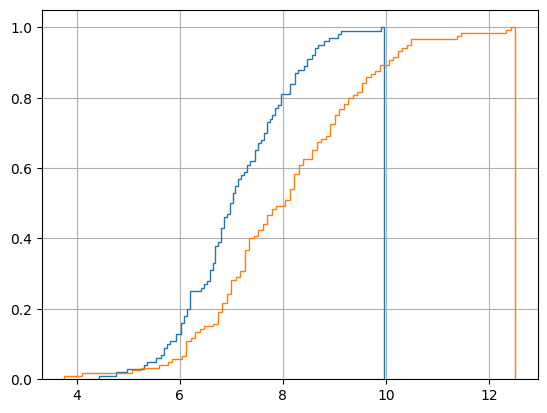

In [ ]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

A/B Testin

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 -O ab_test_data.csv

--2024-07-05 17:24:32--  https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.113, 74.125.20.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1 [following]
--2024-07-05 17:24:32--  https://drive.usercontent.google.com/download?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 883665 (863K) [application/octet-stream]
Saving to: ‘ab_test_data.csv’

ab_test_data.csv    100%[===================>] 862.95K  --.-KB/s    in 0.02s   

2024-07-05 17:24:34 (40.4 MB/s) 

In [ ]:
ab_test_data = pd.read_csv("ab_test_data.csv")

ab_test_data.head(10)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [ ]:
ab_test_data.premium.value_counts()

premium
0    16434
1     3526
Name: count, dtype: int64

In [ ]:
ab_test_data.customer_segmnt.value_counts()

customer_segmnt
treatment    9987
control      9973
Name: count, dtype: int64

In [ ]:
import seaborn as sns

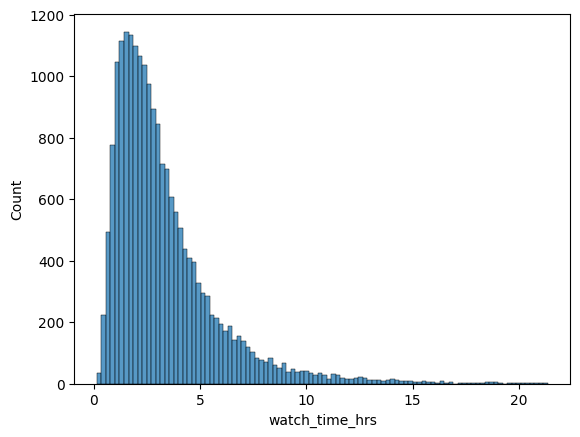

In [ ]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)
plt.show()

In [ ]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()

customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

In [ ]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]

In [ ]:
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])

# The two groups are independent
# So, we'll use the method for independent t-test

print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 5.438408586231319e-57
